# 1.環境設定
## virtual-envで仮想環境作成

```
apt-get install virtual-env
mkdir Python
virtual-env --no-site-packages Python
cd Python
source ./bin/activate
```

## Anacondaをインストール

`
https://www.continuum.io/downloads
`

## condaでprophetをインストール

```
conda install gcc
conda install -c conda-forget fbprophet
```
## scikit-learnもインストール

```
conda install scikit-learn
```

## anacondaのPathを設定

```
export PAHT="your/path/anaconda/bin:$PATH
```

## 文字コードで問題があるなら
sitecustomize.pyをanacondaの配下のpython2.7/site-packagesの配下に作成する

```
import sys
sys.setdefaultencoding('utf-8')
```

# 2.Quiｃｋ Start

In [337]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from fbprophet import Prophet

データファイルの読み込み

In [338]:
INPUT_FILE_PATH = './prophet/examples/example_wp_peyton_manning.csv'

In [339]:
def load_Data(df,load_file_path):
    df = pd.read_csv(load_file_path)
    df['y'] = np.log(df['y'])
    return df

In [340]:
df = None
df = load_Data(df,INPUT_FILE_PATH)
df

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
5,2007-12-15,7.783641
6,2007-12-16,8.414052
7,2007-12-17,8.829226
8,2007-12-18,8.382518
9,2007-12-19,8.069655


予測モデルの生成

In [341]:
m = Prophet()
m.fit(df)

365日分のデータを予測する様にdsを追加する

In [342]:
future = m.make_future_dataframe(periods=365)
future

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
5,2007-12-15
6,2007-12-16
7,2007-12-17
8,2007-12-18
9,2007-12-19


データの予測を実行

In [343]:
forecast = m.predict(future)

予測後に取得できるデータColumnの項目を表示

In [344]:
forecast.columns

Index([u'ds', u't', u'trend', u'seasonal_lower', u'seasonal_upper',
       u'trend_lower', u'trend_upper', u'yhat_lower', u'yhat_upper', u'weekly',
       u'weekly_lower', u'weekly_upper', u'yearly', u'yearly_lower',
       u'yearly_upper', u'seasonal', u'yhat'],
      dtype='object')

データの出力

In [345]:
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
0,2007-12-10,0.000000,8.039078,0.802650,0.802650,8.039078,8.039078,8.231055,9.468937,0.352307,0.352307,0.352307,0.450343,0.450343,0.450343,0.802650,8.841728
1,2007-12-11,0.000337,8.037546,0.552710,0.552710,8.037546,8.037546,7.948920,9.208633,0.119629,0.119629,0.119629,0.433081,0.433081,0.433081,0.552710,8.590255
2,2007-12-12,0.000675,8.036013,0.350084,0.350084,8.036013,8.036013,7.794209,8.981440,-0.066669,-0.066669,-0.066669,0.416754,0.416754,0.416754,0.350084,8.386098
3,2007-12-13,0.001012,8.034481,0.329553,0.329553,8.034481,8.034481,7.750950,8.969117,-0.072254,-0.072254,-0.072254,0.401807,0.401807,0.401807,0.329553,8.364033
4,2007-12-14,0.001350,8.032948,0.319063,0.319063,8.032948,8.032948,7.764657,8.961878,-0.069583,-0.069583,-0.069583,0.388646,0.388646,0.388646,0.319063,8.352011
5,2007-12-15,0.001687,8.031416,0.065916,0.065916,8.031416,8.031416,7.487562,8.731626,-0.311714,-0.311714,-0.311714,0.377630,0.377630,0.377630,0.065916,8.097331
6,2007-12-16,0.002025,8.029883,0.417349,0.417349,8.029883,8.029883,7.799608,9.003361,0.048285,0.048285,0.048285,0.369064,0.369064,0.369064,0.417349,8.447232
7,2007-12-17,0.002362,8.028351,0.715501,0.715501,8.028351,8.028351,8.117940,9.386007,0.352307,0.352307,0.352307,0.363195,0.363195,0.363195,0.715501,8.743852
8,2007-12-18,0.002700,8.026818,0.479832,0.479832,8.026818,8.026818,7.871434,9.133320,0.119629,0.119629,0.119629,0.360203,0.360203,0.360203,0.479832,8.506650
9,2007-12-19,0.003037,8.025286,0.293537,0.293537,8.025286,8.025286,7.698309,8.945576,-0.066669,-0.066669,-0.066669,0.360207,0.360207,0.360207,0.293537,8.318823


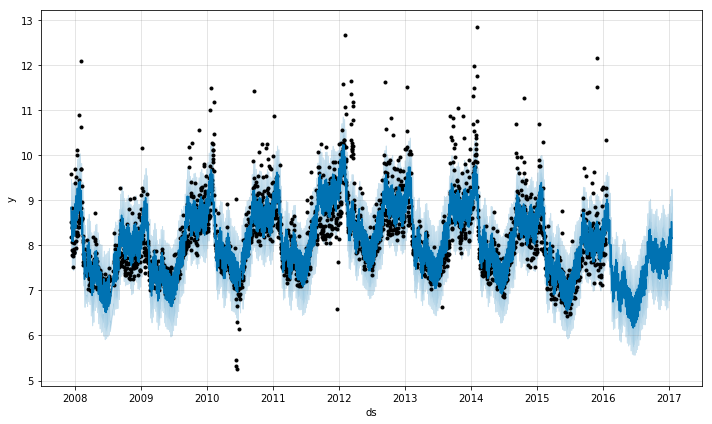

In [346]:
m.plot(forecast)

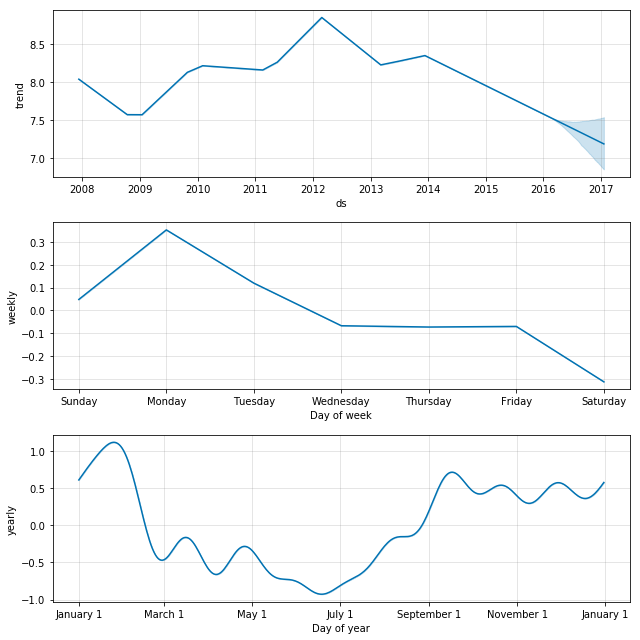

In [347]:
m.plot_components(forecast)

# 3.評価方法

scikit-learnのMSEで2008年のデータで学習し、2009年のデータと比較することで精度を評価する

In [348]:
df['ts'] = pd.to_datetime(df['ds'])
df

,ds,y,ts
0,2007-12-10,9.590761,2007-12-10
1,2007-12-11,8.519590,2007-12-11
2,2007-12-12,8.183677,2007-12-12
3,2007-12-13,8.072467,2007-12-13
4,2007-12-14,7.893572,2007-12-14
5,2007-12-15,7.783641,2007-12-15
6,2007-12-16,8.414052,2007-12-16
7,2007-12-17,8.829226,2007-12-17
8,2007-12-18,8.382518,2007-12-18
9,2007-12-19,8.069655,2007-12-19


In [349]:
df2008 = df[df.ts >= pd.to_datetime('2008-01-01')][df.ts <= pd.to_datetime('2008-12-31')]
len(df2008)

/home/shun/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


337

In [350]:
df2009 = df[df.ts >= pd.to_datetime('2009-01-01')][df.ts <= pd.to_datetime('2009-12-31')]
len(df2009)

/home/shun/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


356

学習と予測

In [351]:
m = Prophet()
m.fit(df2008)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


予測値と正解データを引っ張りだしておく

In [352]:
y_pred = forecast.yhat.values
y_true = df2009.y.values
print len(y_pred)
print len(y_true)

702
356


真値はどうやら欠損値がある様子  
予測の方は2008年のデータを省いておかないとならない

In [353]:
forecast[['ds', 'yhat']].tail(365)

,ds,yhat
337,2009-01-01,7.885587
338,2009-01-02,7.841571
339,2009-01-03,7.630586
340,2009-01-04,8.005975
341,2009-01-05,8.341160
342,2009-01-06,8.091533
343,2009-01-07,7.931540
344,2009-01-08,7.895789
345,2009-01-09,7.851774
346,2009-01-10,7.640788


In [354]:
y_pred = forecast.tail(365).yhat.values

In [355]:
forecast.ds.tail().values

array(['2009-12-27T00:00:00.000000000', '2009-12-28T00:00:00.000000000',
       '2009-12-29T00:00:00.000000000', '2009-12-30T00:00:00.000000000',
       '2009-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [356]:
df2009.ts.tail().values

array(['2009-12-27T00:00:00.000000000', '2009-12-28T00:00:00.000000000',
       '2009-12-29T00:00:00.000000000', '2009-12-30T00:00:00.000000000',
       '2009-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [357]:
y_pred_2 = np.array([])

for index in range(0,len(y_true)):
#    print 'neko'
    for iindex in range(index,365):
#        print df2009.ts.values[index], forecast.tail(365).ds.values[iindex]
        if df2009.ts.values[index] == forecast.tail(365).ds.values[iindex]:
            y_pred_2 = np.append(y_pred_2, y_pred[index])
        
len(y_pred_2)

356

In [358]:
print len(y_pred_2)
print len(y_true)

356
356


sklearnでmseを計算して

In [359]:
from sklearn.metrics import mean_squared_error

In [360]:
mse = mean_squared_error(y_pred_2, y_true)
mse

0.51079578022459671

あんまり良くない。。  
まぁ、欠損値があるにしても1年程度のデータでは足りない様子。  
ここでは示すことはないが、学習データ数を変化したものでそれぞれ比較し、良くなるデータ数は判断するべき。

# 4.prophetの特徴
 - 予測を曲線フィッティングのような感覚で扱える
 - パラメータ調整は以下の3つの感覚で決定する
   - トレンド
   - 周期性
   - イベント

別に機械学習を知らなくても、時系列データの特徴を知り得ている人間がモデルを作成することができるのが売り。  

 - 調整できるパラメータ
   - トレンド(時系列データの大まかな流れ)
     - 右肩上がり(線形)
     - 右肩下がり(線形)
     - 非線形
   - 変化点
     - トレンドが変化する部分
   - 周期性
     - グラフの周期性
   - イベント
     - 上記に依存しない独立した出来事
       - 突発的な出来事
       - 隠れた出来事（Aさんの誕生日になぜかグラフが変化する）
       - etc

# 5. Forecasting Growth
 - prophetのdefaultは線形トレンドである
 - 非線形トレンドは上限が存在するトレンドに利用する感じ
   - ある閾値以上に時系列データが上がらないという前提があればよりフィッティング精度が良くなる

データの読み込み

In [361]:
df = pd.read_csv('./prophet/examples/example_wp_R.csv')
df['y'] = np.log(df['y'])
df.tail()

,ds,y
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145
2862,2015-12-19,7.220374


まずは通常の線形のまま予測する

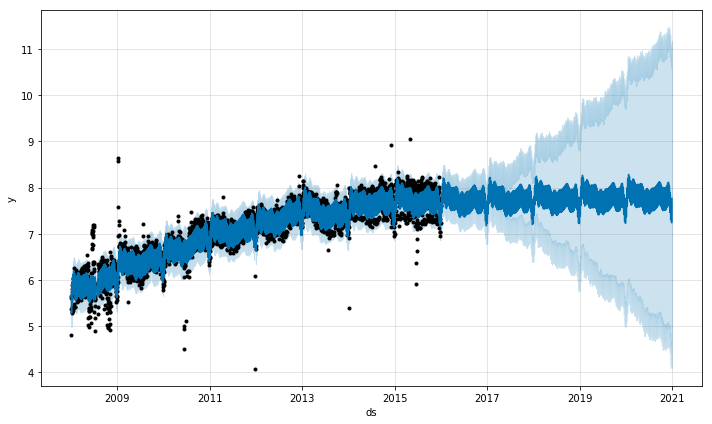

In [362]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1826)
fcst = m.predict(future)
m.plot(fcst)

予測のup,downが広がってあまり良い予測ができているとは思えない

次に非線形で学習する  
まずはわざと上限を7.5に設定する

In [363]:
df['cap'] = 7.5
df

,ds,y,cap
0,2008-01-30,5.976351,7.5
1,2008-01-16,6.049733,7.5
2,2008-01-17,6.011267,7.5
3,2008-01-14,5.953243,7.5
4,2008-01-15,5.910797,7.5
5,2008-01-12,5.407172,7.5
6,2008-01-13,5.323010,7.5
7,2008-01-10,5.880533,7.5
8,2008-01-11,5.645447,7.5
9,2008-01-18,5.958425,7.5


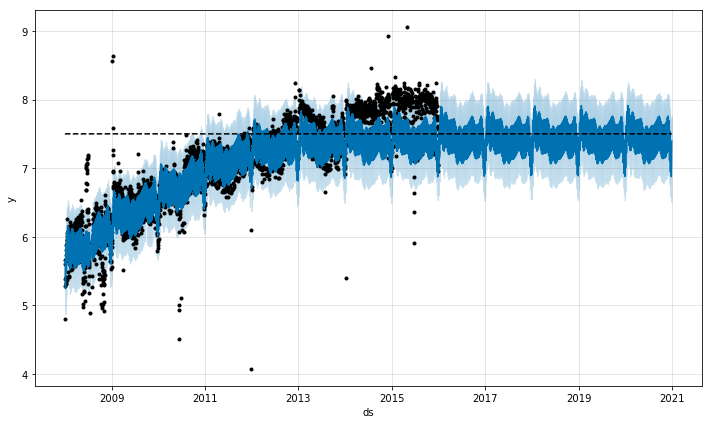

In [364]:
m = Prophet(growth='logistic')
m.fit(df)
future = m.make_future_dataframe(periods=1826)
future['cap'] = 7.5
fcst = m.predict(future)
m.plot(fcst)

わざと上限を低く見積もっているため、データとも不一致が起きているのが確認できる  
さらに、その後の予測も7.5以上に向上することができていない  
これも良いとは言えない

次に8.5(良い上限)に設定する

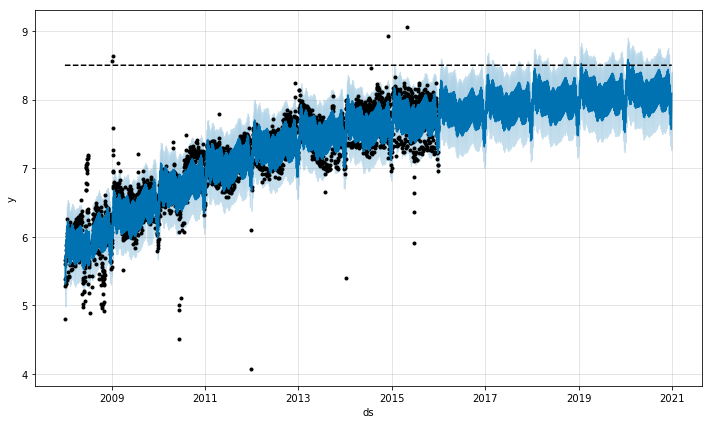

In [365]:
df = pd.read_csv('./prophet/examples/example_wp_R.csv')
df['y'] = np.log(df['y'])
df['cap'] = 8.5
m = Prophet(growth='logistic')
m.fit(df)
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst)

データとのフィッティングも予測もそれらしいものになっている

つぎに、余裕をもたせた上限を設定してみる

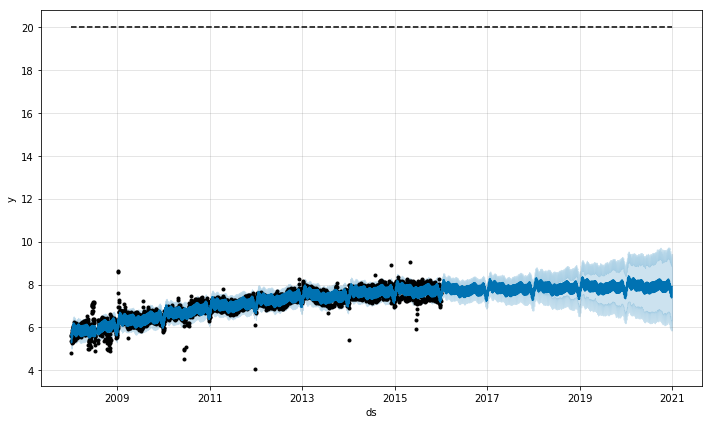

In [366]:
df = pd.read_csv('./prophet/examples/example_wp_R.csv')
df['y'] = np.log(df['y'])
df['cap'] = 20
m = Prophet(growth='logistic')
m.fit(df)
future = m.make_future_dataframe(periods=1826)
future['cap'] = 20
fcst = m.predict(future)
m.plot(fcst)

データとのフィッティングは良いが、線形の時ほどではないが、予測の幅が広がっている  
適切な上限を設定することが、非線形トレンドを扱う上で重要であることがわかる

# 6. Adjusting trend flexibility
 - データ(トレンド)との適合度の調整を行う
   - オーバーフィッティング(過学習)の原因を緩和・調整するための方法がある

まずは普通にフィッティング

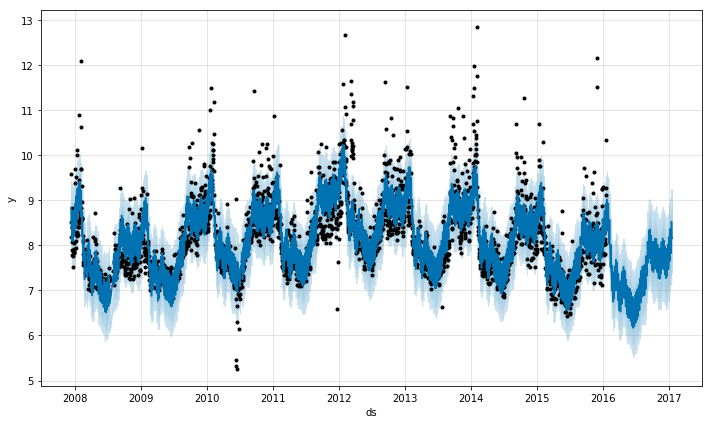

In [367]:
df = None
df = load_Data(df,INPUT_FILE_PATH)
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
fcst = m.predict(future)
m.plot(fcst)

次にオーバーフィッティングするようにパラメータを設定する

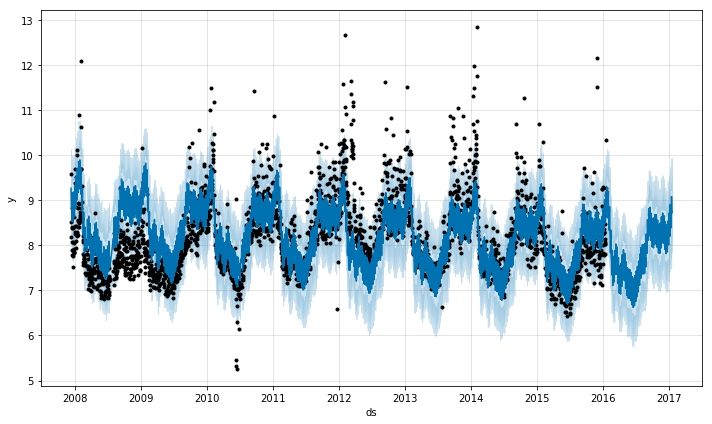

In [368]:
m = Prophet(changepoint_prior_scale=0.00013)
m.fit(df)
future = m.make_future_dataframe(periods=365)
fcst = m.predict(future)
m.plot(fcst)

次にかなり緩めに設定する

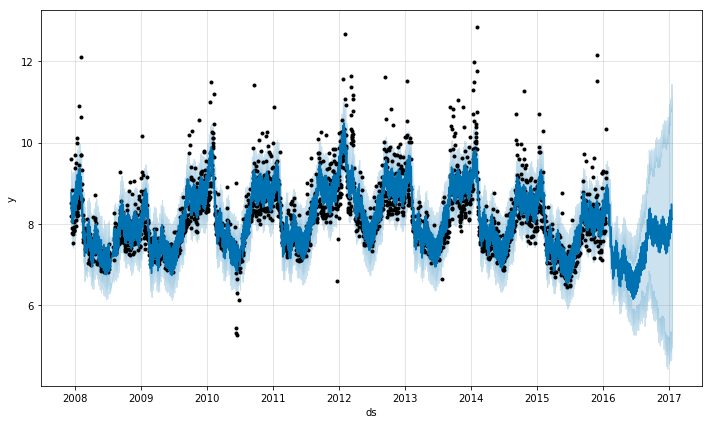

In [369]:
m = Prophet(changepoint_prior_scale=1.0)
m.fit(df)
future = m.make_future_dataframe(periods=365)
fcst = m.predict(future)
m.plot(fcst)

予測の裾が広がっているが、過学習になっていないことがわかる  
これはモデル評価時にGridSearchすることで適当な値にする必要がある  

 - 先ほどのcapもハイパーパラメータであるが、感覚で設定できそうなパラメータである
 - この章のパラメータは感覚では設定が難しい

# 7. Trend Changepoints
 - prophetはdefaultでトレンドの変化点を25個等間隔で配置する
 - 変化点が事前に予測がつくのであれば、その点を最初に設定することができる
   - 直接指定する方法
   - ポイント点数を指定する方法

まずは普通にフィッティング

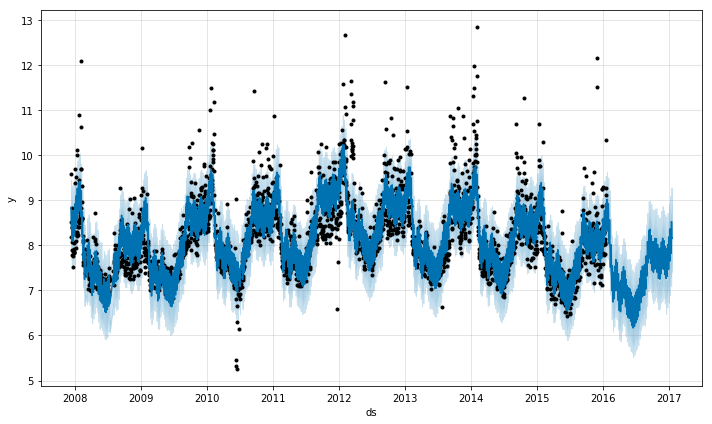

In [370]:
df = None
df = load_Data(df,INPUT_FILE_PATH)
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
fcst = m.predict(future)
m.plot(fcst)

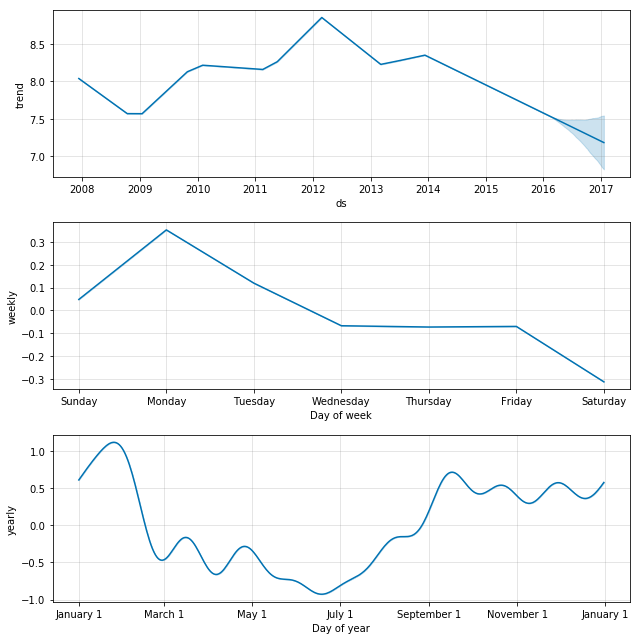

In [371]:
m.plot_components(fcst)

つぎは変化点を明示的に設定する

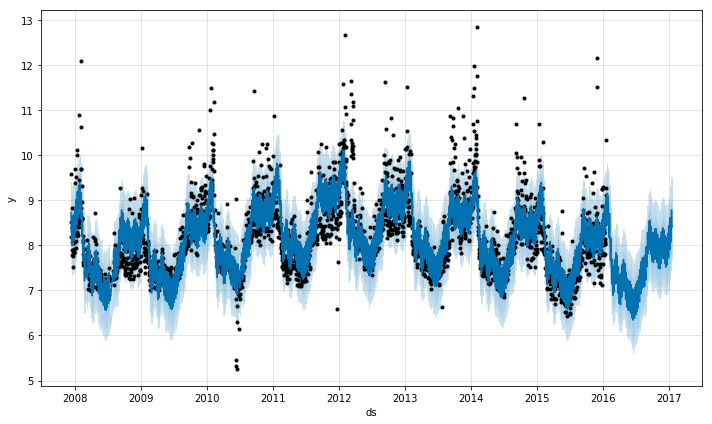

In [372]:
df = None
df = load_Data(df,INPUT_FILE_PATH)
m = Prophet(changepoints=['2009-01-01','2012-01-01'])
m.fit(df)
future = m.make_future_dataframe(periods=365)
fcst = m.predict(future)
m.plot(fcst)

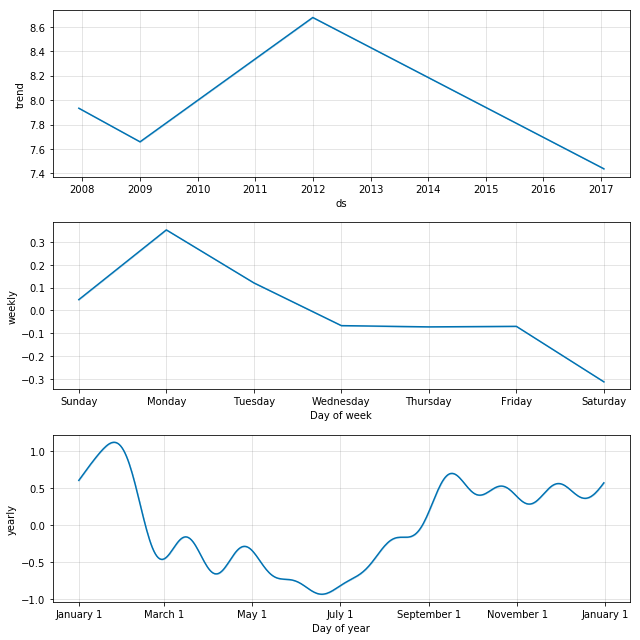

In [373]:
m.plot_components(fcst)

トレンドの変化が指定した2点になっていることが確認できる  

次は変化点の個数だけ変化させる  
ここでは極端な例として変化点を設定しないこととする

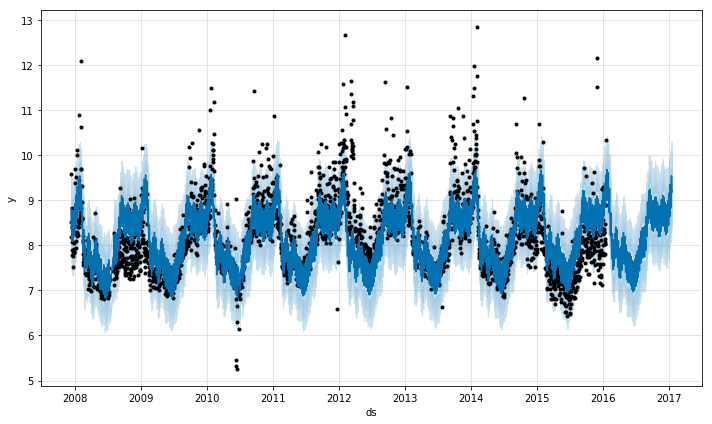

In [374]:
df = None
df = load_Data(df,INPUT_FILE_PATH)
m = Prophet(n_changepoints = 0)
m.fit(df)
future = m.make_future_dataframe(periods=365)
fcst = m.predict(future)
m.plot(fcst)

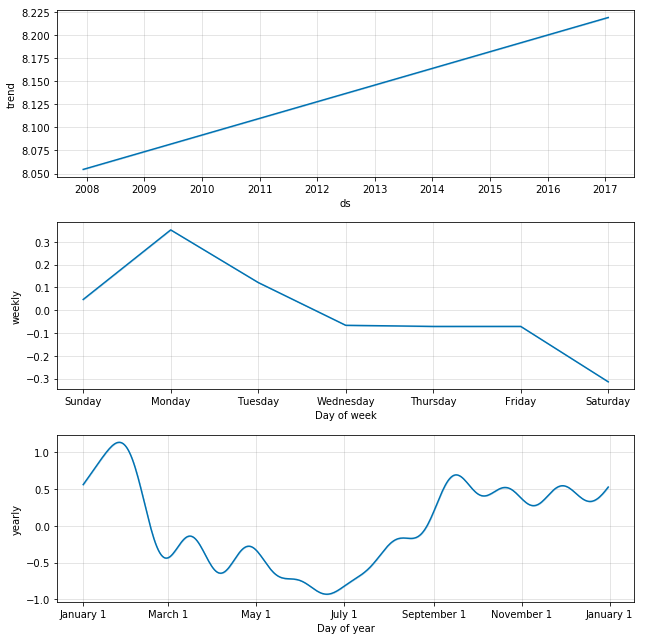

In [375]:
m.plot_components(fcst)

適切にフィッティング・予測ができていれば、上に凸なトレンドになっている  
変化点を考慮しない場合、トレンドがフィッティングも予測も水平となっている  
データとの適合度も悪いように見える  

しかし、変化点を多くすると過学習の原因になる可能性を秘めていることに注意する  
トレンドの変化点がわかっていれば、フィッティング精度はよくできる可能性がある  

### おまけ
以下はこれまでに示した設定パラメータを複合的に指定する  
Prophet関数の引数にカンマで与えれば良い

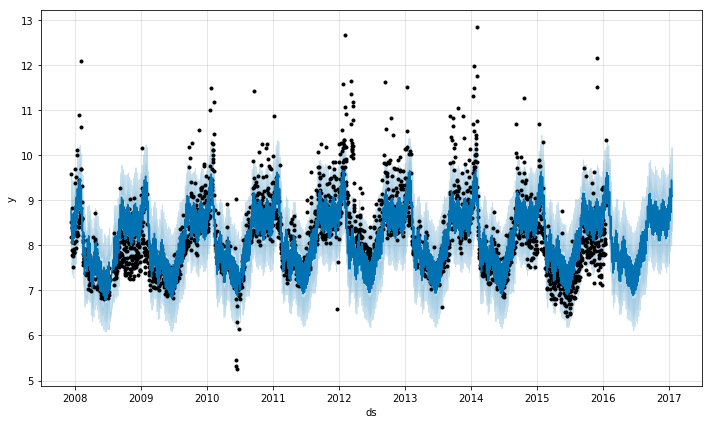

In [376]:
df = load_Data(df,INPUT_FILE_PATH)
m = Prophet(changepoint_prior_scale=0.0005,changepoints=['2009-01-01','2012-01-01'])
m.fit(df)
future = m.make_future_dataframe(periods=365)
fcst = m.predict(future)
m.plot(fcst)

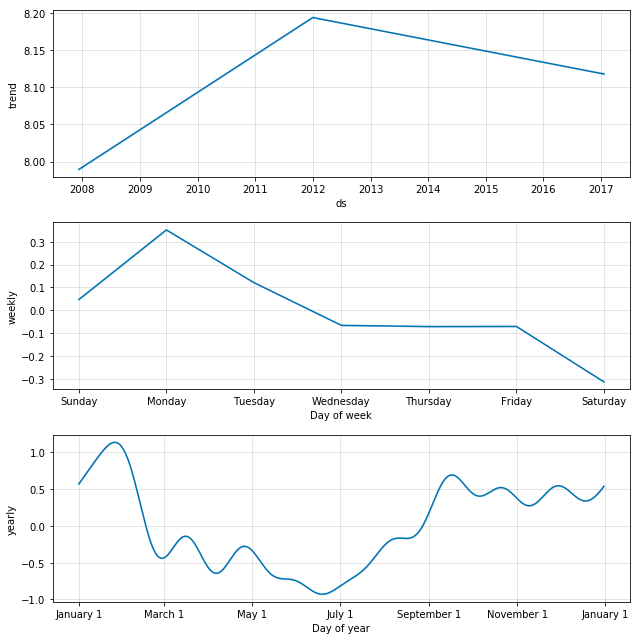

In [377]:
m.plot_components(fcst)

トレンドの変化が緩まっていることがわかる

# 8.Selecition of Periodicity
 - 考慮したくない周期性を指定できる
   - 週、年の単位で周期性の考慮の有無を選択する

年の周期性を考慮しない

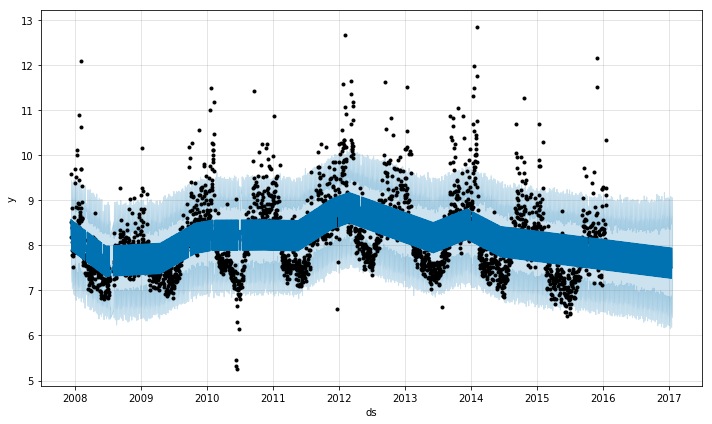

In [378]:
df = load_Data(df,INPUT_FILE_PATH)
m = Prophet(yearly_seasonality=False)
m.fit(df)
future = m.make_future_dataframe(periods=365)
fcst = m.predict(future)
m.plot(fcst)

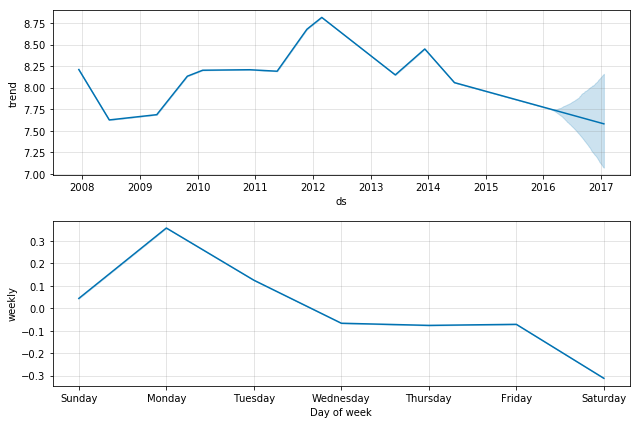

In [379]:
m.plot_components(fcst)

週の周期性を考慮しない

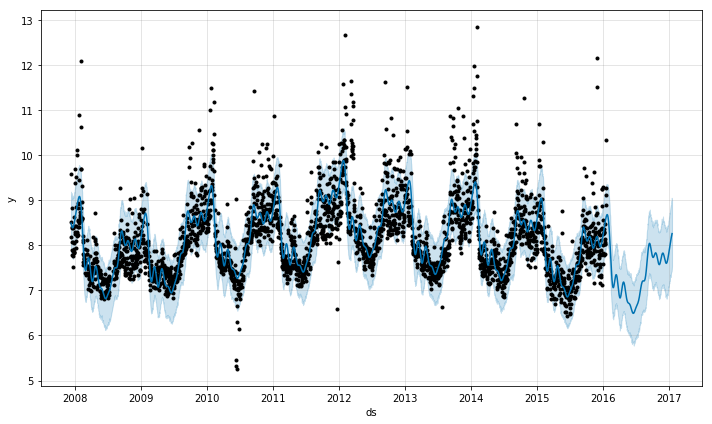

In [380]:
df = load_Data(df,INPUT_FILE_PATH)
m = Prophet(weekly_seasonality=False)
m.fit(df)
future = m.make_future_dataframe(periods=365)
fcst = m.predict(future)
m.plot(fcst)

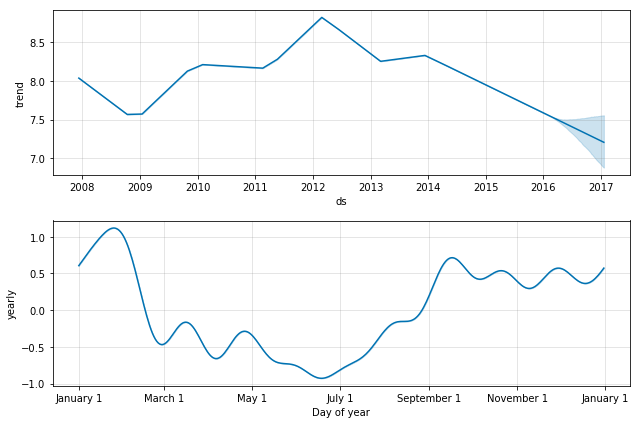

In [381]:
m.plot_components(fcst)

周期性のないデータであれば外したほうが良い

# 9. Holiday Effects
 - 休日などの特別な日に時系列データの変化に影響する日程を考慮する
   - lower,upperは指定した日程の前後数日まで範囲を広げることができる
 - 複数定義する場合はコンカチして設定する

In [382]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07',
                        '2017-01-01', '2017-02-07', '2018-01-01', '2018-02-07',]),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

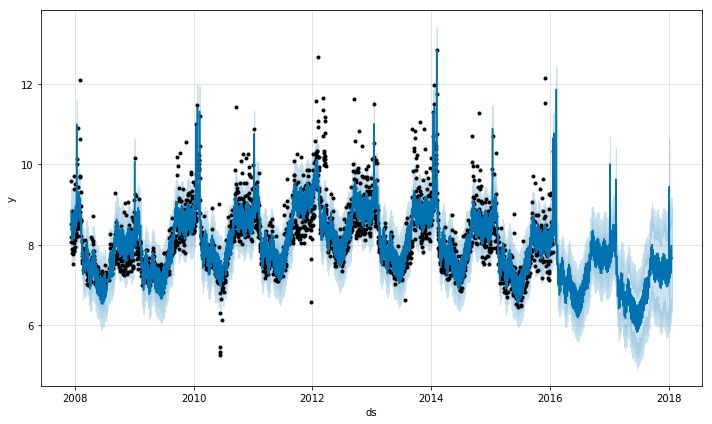

In [383]:
df = load_Data(df,INPUT_FILE_PATH)
m = Prophet(holidays=holidays)
m.fit(df)
future = m.make_future_dataframe(periods=365*2)
fcst = m.predict(future)
m.plot(fcst)

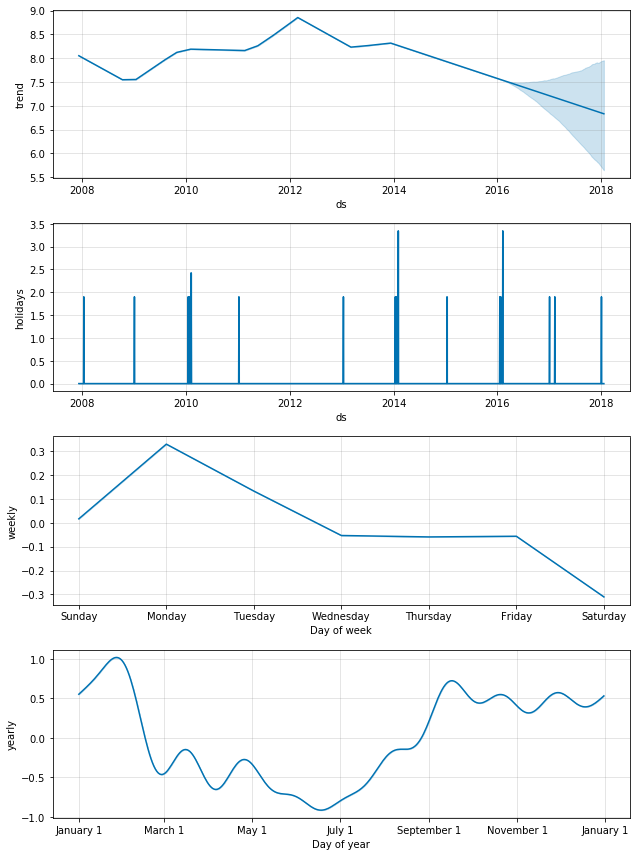

In [384]:
m.plot_components(fcst)

大きく外しているデータもフィッティングできていることが確認できる

# 10.まとめ
 - データからフィッティングモデルを作成するのに直感的に色々と操作できるのが売り
 - 機械学習のハードルを下げる目的でより一般的に利用することを目指している
 - 時系列データの特徴(トレンドや周期、依存日)を事前に知っていれば使い勝手が良さそう
 - データの特性を外乱との因果を紐解くことが鍵となる